In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/population-growth-by-each-country/API_SP.POP.GROW_DS2_en_csv_v2_2594848.csv


# **Import**

In [2]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from plotly.subplots import make_subplots
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

# **1. Data Import & EDA**

In [3]:
df = pd.read_csv('/kaggle/input/population-growth-by-each-country/API_SP.POP.GROW_DS2_en_csv_v2_2594848.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 65 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  266 non-null    object 
 1   Country Code  266 non-null    object 
 2   1961          264 non-null    float64
 3   1962          264 non-null    float64
 4   1963          264 non-null    float64
 5   1964          264 non-null    float64
 6   1965          264 non-null    float64
 7   1966          264 non-null    float64
 8   1967          264 non-null    float64
 9   1968          264 non-null    float64
 10  1969          264 non-null    float64
 11  1970          264 non-null    float64
 12  1971          264 non-null    float64
 13  1972          264 non-null    float64
 14  1973          264 non-null    float64
 15  1974          264 non-null    float64
 16  1975          264 non-null    float64
 17  1976          264 non-null    float64
 18  1977          264 non-null    

In [5]:
df.shape

(266, 65)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
1961,264.0,2.199703,1.379374,-1.015528,1.370304,2.244547,2.845425,10.638254
1962,264.0,2.289090,1.381291,-1.510091,1.418289,2.305791,2.844092,11.774148
1963,264.0,2.362077,1.520142,-1.845309,1.484893,2.394978,2.885317,12.851885
1964,264.0,2.307069,1.374447,-2.110700,1.478129,2.403899,2.873235,12.147917
1965,264.0,2.293815,1.418463,-2.354033,1.412700,2.406523,2.847189,11.964503
...,...,...,...,...,...,...,...,...
2019,265.0,1.158376,1.205938,-2.904996,0.376952,1.064418,1.978457,3.931356
2020,265.0,1.053146,1.188376,-2.984077,0.243223,0.985783,1.897864,3.727101
2021,265.0,0.901751,1.293551,-4.257139,0.180375,0.885811,1.874985,3.707424
2022,264.0,0.910445,1.559003,-14.316543,0.257863,0.912870,1.894213,3.712988


**Missing Value Check**

In [7]:
df.isnull().sum()

Country Name    0
Country Code    0
1961            2
1962            2
1963            2
               ..
2019            1
2020            1
2021            1
2022            2
2023            1
Length: 65, dtype: int64

**Duplicated value check**

In [8]:
df.duplicated().sum()

0

In [9]:
df.head()

,Country Name,Country Code,1961,1962,1963,1964,1965,1966,1967,1968,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,2.179059,1.548572,1.389337,1.215721,1.032841,0.862184,0.388847,-0.085719,...,0.691615,0.637959,0.590062,0.537296,0.494795,0.451970,0.134255,-0.045045,-0.086392,-0.157953
1,Africa Eastern and Southern,AFE,2.660180,2.732633,2.753248,2.806915,2.840787,2.813609,2.830505,2.881589,...,2.774990,2.802586,2.728159,2.655672,2.688371,2.691134,2.678184,2.607472,2.543757,2.531587
2,Afghanistan,AFG,1.925952,2.014879,2.078997,2.139651,2.216007,2.253524,2.292638,2.347351,...,3.657576,3.121341,2.581549,2.866492,2.885208,2.908529,3.134747,2.851358,2.534498,2.665628
3,Africa Western and Central,AFW,2.115789,2.145723,2.190827,2.211360,2.242567,2.272816,2.275721,2.295953,...,2.750731,2.723317,2.713059,2.706266,2.669239,2.633982,2.615646,2.573377,2.539799,2.540864
4,Angola,AGO,1.558355,1.460738,1.410425,1.301745,1.111041,0.875806,0.696698,0.695985,...,3.684429,3.617678,3.586211,3.550987,3.464457,3.395278,3.268348,3.166030,3.096753,3.030996


# **2. Data Transform with Visualization**

In [10]:
df = df.dropna()

## **Histogram**

In [11]:
num_cols = df.select_dtypes(include=['float64']).columns

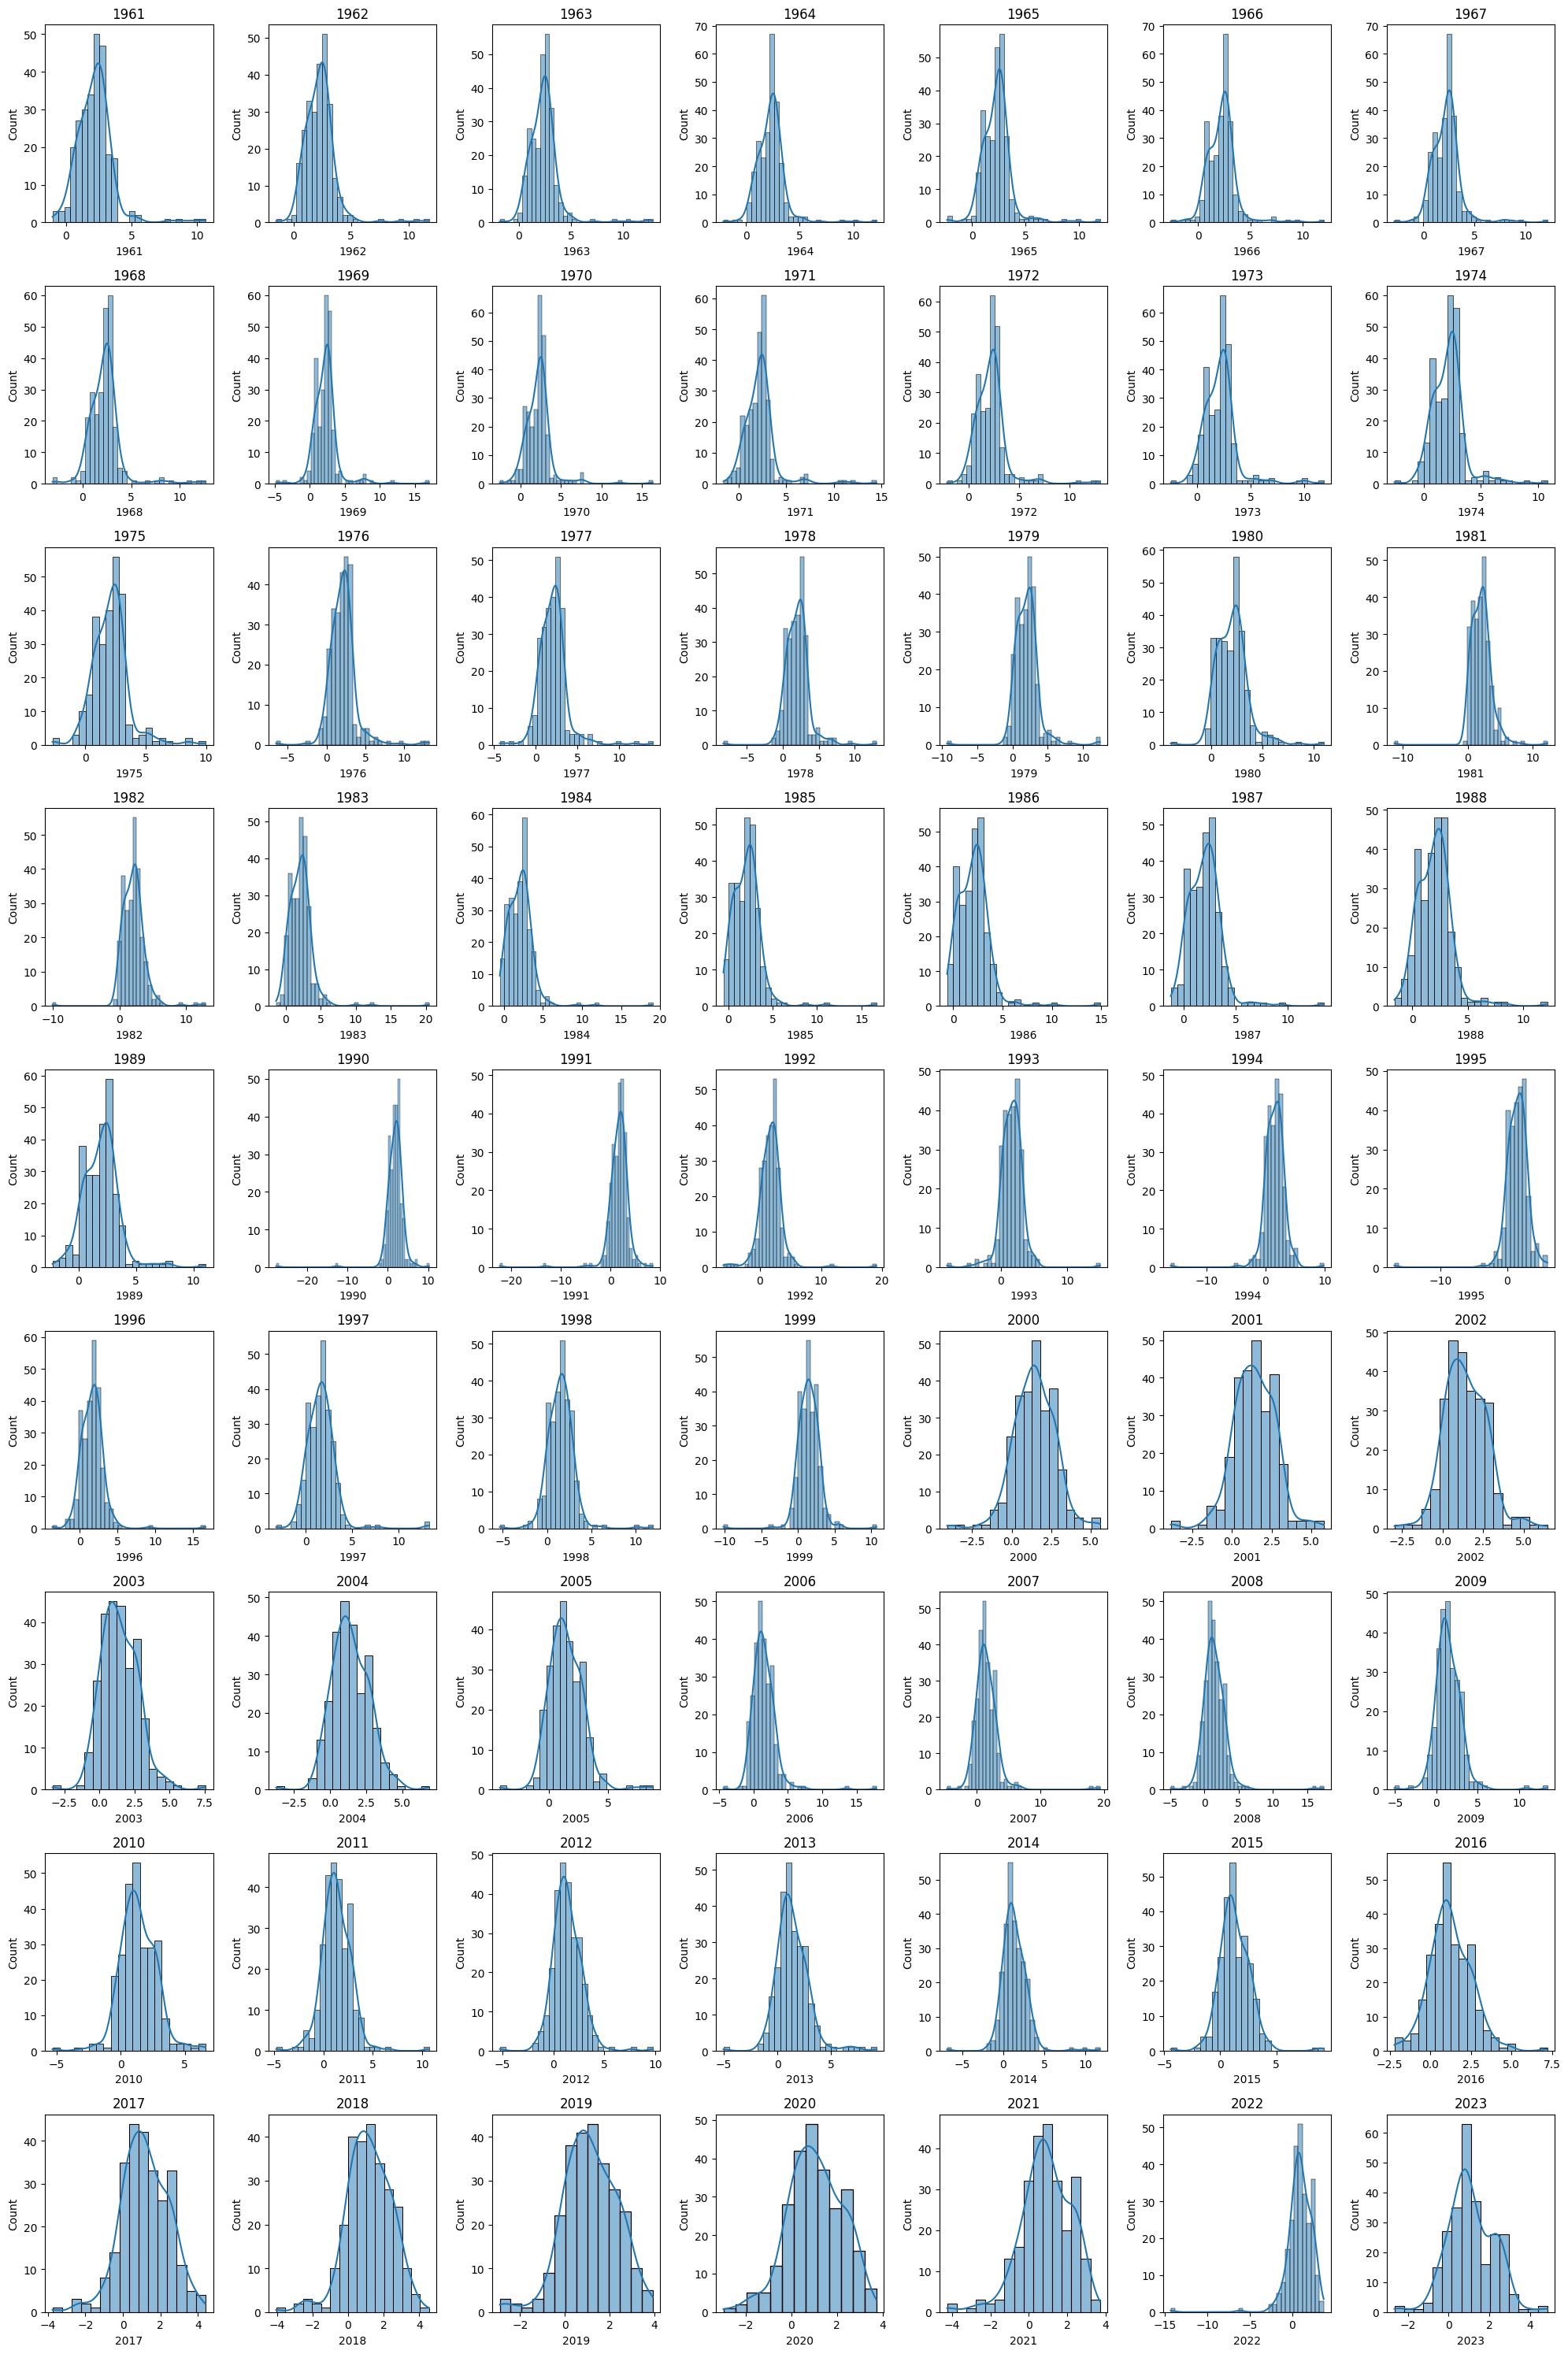

In [12]:
#Histogram of population changes by year

f, ax = plt.subplots(9,7, figsize=(20, 30))
ax = ax.flatten()

for index, cols in enumerate(num_cols):
    sns.histplot(data= df, x = cols, ax = ax[index], kde=True)
    ax[index].set_title(cols)
    
plt.tight_layout()
plt.show() 

* **Many countries have positive population growth every year.**

## **Population change by country**

In [13]:
#Reconfiguration of Data

df2 = df.melt(id_vars = ['Country Name'], value_vars = num_cols, var_name='Year', value_name='Growth')
df2['Year'] = df2['Year']
df2.head()

,Country Name,Year,Growth
0,Aruba,1961,2.179059
1,Africa Eastern and Southern,1961,2.660180
2,Afghanistan,1961,1.925952
3,Africa Western and Central,1961,2.115789
4,Angola,1961,1.558355


### **Ukraine's Population Change**

In [14]:
Ukraine = df2.loc[df2['Country Name'] == 'Ukraine', :].reset_index().sort_values(by='Year', ascending=True)

In [15]:
fig =  px.line(Ukraine, x='Year', y='Growth', title='Ukraine\'s Population Change', markers=True , template = 'plotly_dark')

fig.update_xaxes(ticks="outside", dtick=1)
fig.add_annotation(x = 61, y =-14.3,
            text = "The War in Ukraine",
            showarrow = True,
            arrowhead = 2,
            font_size = 15,
            arrowside = 'start')
fig.show()

### **China's Population Change**

In [16]:
China = df2.loc[df2['Country Name'] == 'China', :].reset_index().sort_values(by='Year', ascending=True)

In [17]:
fig =  px.line(China, x='Year', y='Growth', title='China\'s Population Change', markers=True , template = 'plotly_dark')

fig.update_xaxes(ticks="outside", dtick=1)

fig.show()

### **Japan's Population Change**

In [18]:
Japan = df2.loc[df2['Country Name'] == 'Japan', :].reset_index().sort_values(by='Year', ascending=True)

In [19]:
fig =  px.line(Japan, x='Year', y='Growth', title='Japan\'s Population Change', markers=True , template = 'plotly_dark')

fig.update_xaxes(ticks="outside", dtick=1)

fig.show()

### **Republic of Korea's Population Change**

In [20]:
Korea = df2.loc[df2['Country Name'] == 'Korea, Rep.', :].reset_index().sort_values(by='Year', ascending=True)

In [21]:
fig =  px.line(Korea, x='Year', y='Growth', title='Republic of Korea\'s Population Change', markers=True , template = 'plotly_dark')

fig.update_xaxes(ticks="outside", dtick=1)

fig.show()

### **Average population changes in OECD member**

In [22]:
OECD = df2.loc[df2['Country Name'] == 'OECD members', :].reset_index().sort_values(by='Year', ascending=True)

In [23]:
fig =  px.line(OECD, x='Year', y='Growth', title='Average population changes in OECD member', markers=True , template = 'plotly_dark')

fig.update_xaxes(ticks="outside", dtick=1)

fig.show()

**Please leave your advice in the comments. Thank you**